# Lab 10
~Rohit R Jorige

In [35]:
#libraries
import math
import matplotlib.pyplot as plt
import numpy as np # only used to plot the graph


In [4]:
#gauss seidel method without using numpy
def norm(x):
    return max(x)
def subtract_list_elem(a,b):
    ans=[]
    for i in range(len(a)):
        ans.append(a[i]-b[i])
    return ans
def summation_seidel(A, i, curr_x, new_x):
    final_sum = 0
    for j in range(0, i):
        final_sum += new_x[j] * A[i][j]
    for j in range(i+1, len(A[i])):
        final_sum += curr_x[j] * A[i][j]
    return final_sum

def Seidel_alt(A, b, x, tol):
    prev_x = x
    curr_x = x
    while True:
        new_x = []
        for i in range(len(A)):
            x_i = (b[i] - summation_seidel(A, i, curr_x, new_x)) / A[i][i]
            new_x.append(x_i)
        if norm(subtract_list_elem(new_x, curr_x)) / norm(new_x) < tol:
            return new_x
        curr_x = new_x

In [5]:
#general finite difference method
#inputs : endpoints (a,b) , boundary conditions (y(a),y(b)) , integrer N>=2, differential equation(p(x),q(x),r(x))
#ouput : approximations w_i to y(x_i) for each i = 0, 1, ... , N + 1
#the differential equation is of the form y' = p(x)y' + q(x)y + r(x)
def construct_matrix(N):
    matrix_A=[]
    matrix_B=[]
    matrix_X=[]
    for i in range(N):
        matrix_A.append([])
        matrix_B.append(0)
        matrix_X.append(0)
    for  i in range(N):
        for j in range(N):
            matrix_A[i].append(0)
    return matrix_A,matrix_B,matrix_X
def finite_difference(a,b,alpha,beta,N,p,q,r):
    matrix_A,matrix_B,matrix_X=construct_matrix(N)
    h=(b-a)/(N+1)
    x=a+h
    #calculating  all x_1 values
    a_1=2 + (h**2)*q(x)
    b_1= -1 + (h/2)*p(x)
    d_1=-(h**2)*r(x) + (1 + (h/2)*p(x))*alpha
    matrix_A[0][0]=a_1
    matrix_A[0][1]=b_1
    matrix_B[0]=d_1
    #calculating all x_i values from 2 to N-1
    for i in range(1,N-1):
        x=a+(i+1)*h
        a_i= -1 - (h/2)*p(x)
        b_i=  2 + (h**2)*q(x)
        c_i= -1 + (h/2)*p(x)
        d_i=-(h**2)*r(x)
        matrix_A[i][i-1]=a_i
        matrix_A[i][i]=b_i
        matrix_A[i][i+1]=c_i
        matrix_B[i]=d_i
    #calculating  all x_N values
    x=b-h
    a_N= -1 - (h/2)*p(x)
    b_N=  2 + (h**2)*q(x)
    d_N=  -(h**2)*r(x) + (1 - (h/2)*p(x))*beta
    matrix_A[N-1][-2]=a_N
    matrix_A[N-1][-1]=b_N
    matrix_B[-1]=d_N
    #print("Matrix A is",matrix_A)
    #print("Matrix B is",matrix_B)
    return Seidel_alt(matrix_A,matrix_B,matrix_X,0.00000000001)

**Q1.** Use the Linear Finite-Difference Algorithm with N = 9 to approximate the solution to the
boundary value problem,

$y^{"} = -\frac{2}{x}y^{'} +\frac{2}{x^2}y+\frac{sin(\ln x)}{x^2}$

$1 \leq x \leq 2$ , $y(1) = 1$ , $y(2) = 2$

and compare the results to those obtained using the linear shooting method for the same problem.


In [6]:
def p(x):
    ans=-2/x
    return ans
def q(x):
    ans=2/(x**2)
    return ans
def r(x):
    ans= (math.sin(math.log(x)))/x**2
    return ans
solution=finite_difference(1,2,1,2,9,p,q,r)
for i in solution:
    print(i)

1.0926005206437606
1.187043128668555
1.2833368700615362
1.3814020460698797
1.4811202619640589
1.5823598955678606
1.6849890182890201
1.788881746131507
1.893921099127733


**Q2.** Consider the boundary value problem

$y^{"}=-(x+1)y^{'}+2y+(1-x^2)e^{-x}$

$0 \leq x \leq 1$ , $y(0) = 1$ , $y(1) = 0$

Use N = 9 and N = 19 respectively and apply the Linear Finite-Difference Algorithm with N = 9
to approximate the solution to the above boundary value problem


The solution for N=9 is 
0.7637068009927273
0.5750195530328508
0.4259574711601672
0.3094199581908733
0.21917622033641565
0.14983393833148204
0.09679150666215999
0.05617822574757339
0.024786540568339992
The solution for N=19 is 
0.8754842088255258
0.7639151932535033
0.6642151260394605
0.5753604387711247
0.4963824866922035
0.42636778191720764
0.3644578288912448
0.30984859700629647
0.2617896659160541
0.21958307930777204
0.18258194271113576
0.15018880037577106
0.12185382536047765
0.09707285578216729
0.07538530870738477
0.05637200147277722
0.03965290833267316
0.02488487829202604
0.011759337830834283


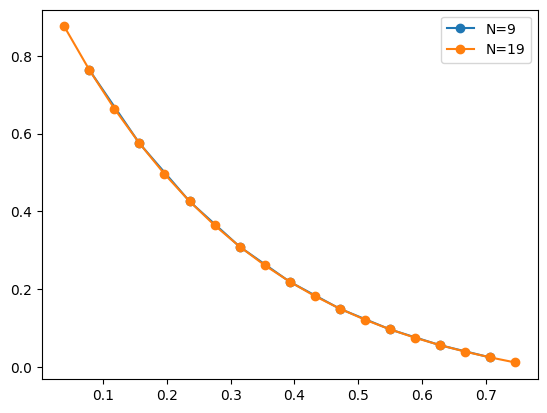

In [38]:
def p(x):
    ans=-x-1
    return ans
def q(x):
    ans=2
    return ans
def r(x):
    ans= (1-x**2)*math.exp(-x)
    return ans
N=9
solution1=finite_difference(0,1,1,0,N,p,q,r)
x_values1 = np.linspace(0, (math.pi)/4, N+2)[1:-1] 
print("The solution for N={} is ".format(N))
for i in solution1:
    print(i)

N=19
solution2=finite_difference(0,1,1,0,N,p,q,r)
x_values2 = np.linspace(0, (math.pi)/4, N+2)[1:-1] 
print("The solution for N={} is ".format(N))
for i in solution2:
    print(i)

plt.plot(x_values1, solution1, 'o-', label='N=9')
plt.plot(x_values2, solution2, 'o-', label='N=19')
plt.legend()
plt.show()

**Q3.** Use the Linear Finite-Difference Algorithm with N = 4 to approximate the solution of the
boundary value problem

$y^{"}+4y=cos(x)$

$0 \leq x \leq \frac{\pi}{4}$ , $y(0) = 0$ , $y(\frac{\pi}{4}) = 0$

and compare the results to the actual solution where the actual solution is given by

$y(x)=-\frac{1}{3}cos(2x) -\frac{\sqrt 2}{6}sin(2x)+\frac{1}{3}cos(x)$

The solution for N=4 is 
-0.06141844977636928
-0.09240490854870977
-0.09080498945392074
-0.058258272342832616
The real solution for N=4 is 
0.0
-0.07123076739371831
-0.09440908289175365
-0.06816510083357769
-2.7755575615628914e-17
0.0


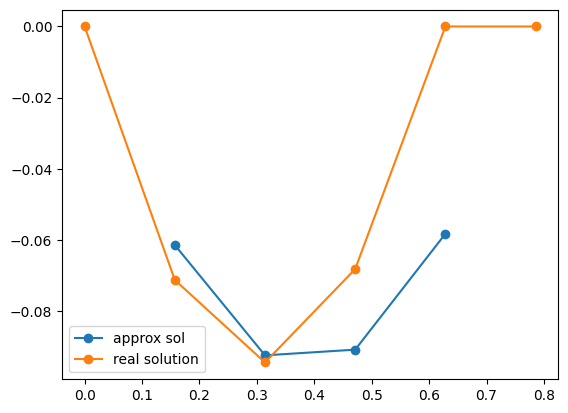

In [30]:
def p(x):
    ans=0
    return ans
def q(x):
    ans=-4
    return ans
def r(x):
    ans= math.cos(x)
    return ans
def real_solution(a,b,N):
    solution=[]
    solution.append(-math.cos(2*a)/3 -(math.sqrt(2)*math.sin(2*a))/6 +math.cos(a)/3)
    h=(b-a)/N
    for k in range(1,N+1):
        x=a+h*k
        ans=-math.cos(2*x)/3 -(math.sqrt(2)*math.sin(2*x))/6 +math.cos(x)/3
        solution.append(ans)
    solution.append(-math.cos(2*a)/3 -(math.sqrt(2)*math.sin(2*a))/6 +math.cos(a)/3)
    return solution

N=4
#finite difference function is called here
solution1=finite_difference(0,(math.pi)/4,0,0,N,p,q,r)
x_values1 = np.linspace(0, (math.pi)/4, N+2)[1:-1] 
print("The solution for N={} is ".format(N))
for i in solution1:
    print(i)
#real solution fuction is called here
solution2=real_solution(0,(math.pi)/4,N)
x_values2 = np.linspace(0, (math.pi)/4, N+2) 
print("The real solution for N={} is ".format(N))
for i in solution2:
    print(i)

plt.plot(x_values1, solution1, 'o-', label='approx sol')
plt.plot(x_values2, solution2, 'o-', label='real solution')
plt.legend()
plt.show()